In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all_log_1e4_fit.csv", delim_whitespace=True)

In [3]:
df.head(5)

,detector,eta,pt,pt_res,pt_resE,p_res,p_resE
0,MM_6_3x2_1D,0,10,2.125370,0.017687,2.125450,0.017685
1,MM_6_3x2_1D,0,1,0.834690,0.007203,0.839432,0.007362
2,MM_6_3x2_1D,0,20,3.989230,0.034151,3.989230,0.034151
3,MM_6_3x2_1D,0,2,0.905125,0.007399,0.905168,0.007397
4,MM_6_3x2_1D,0,30,5.941470,0.055970,5.941470,0.055970


In [4]:
def getdata(det="TPC", eta=0):
    pt = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt"])
    pt_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt_res"])
    pt_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt_resE"])
    p_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["p_res"])
    p_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["p_resE"])
    return pt, pt_res, pt_resE, p_res, p_resE

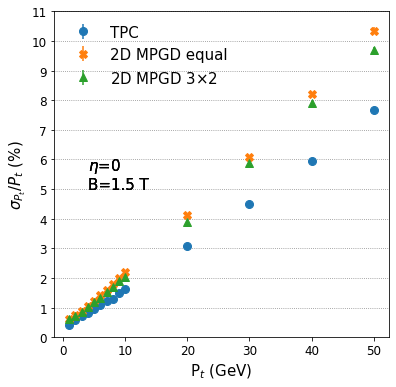

In [5]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
#for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, pt_res, pt_resE, p_res, p_resE = getdata(i)
    ax.errorbar(pt, pt_res, yerr=pt_resE, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax.set_ylabel("$\sigma_{P_t}/P_t$ (%)", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.yaxis.set_ticks(np.arange(0, 12, 1))
    ax.set_ylim([0,11])
    ax.text(0.1, 0.5, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("momentum_resolution_pt_eta0.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_pt_eta0.png", transparent=True, bbox_inches='tight', dpi=600)

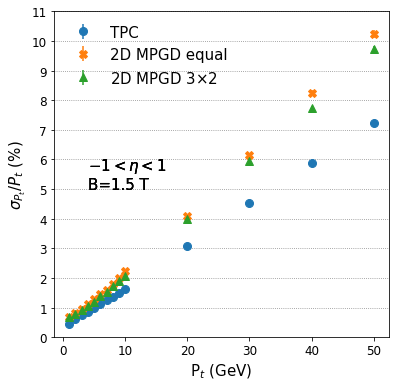

In [6]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, pt_res, pt_resE, *_ = getdata(i,1)
    ax.errorbar(pt, pt_res, yerr=pt_resE, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax.set_ylabel("$\sigma_{P_t}/P_t$ (%)", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.yaxis.set_ticks(np.arange(0, 12, 1))
    ax.set_ylim([0,11])
    ax.text(0.1, 0.5, '$-1<\eta<1$\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("momentum_resolution_pt_eta1.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_pt_eta1.png", transparent=True, bbox_inches='tight', dpi=600)

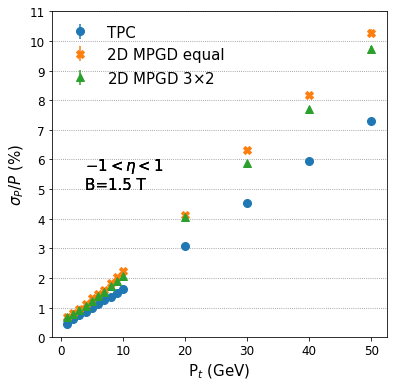

In [7]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, pt_res, pt_resE, p_res, p_resE = getdata(i,1)
    ax.errorbar(pt, p_res, yerr=p_resE, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax.set_ylabel("$\sigma_{P}/P$ (%)", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.yaxis.set_ticks(np.arange(0, 12, 1))
    ax.set_ylim([0,11])
    ax.text(0.1, 0.5, '$-1<\eta<1$\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("momentum_resolution_p_eta1.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_p_eta1.png", transparent=True, bbox_inches='tight', dpi=600)

In [8]:
# estimate slope and intercept
pt, pt_res, pt_resE, *_ = getdata("MM_6_3x2_2D",0)

print((pt_res[pt==50]-pt_res[pt==1])[0]/49)

print(pt_res[pt==50][0]-(pt_res[pt==50]-pt_res[pt==1])[0]/49*50)

0.18518400000000002
0.43156000000000105


In [9]:
# estimate slope and intercept
pt, pt_res, pt_resE, *_ = getdata("TPC",0)

print((pt_res[pt==50]-pt_res[pt==1])[0]/49)

print(pt_res[pt==50][0]-(pt_res[pt==50]-pt_res[pt==1])[0]/49*50)

0.14759985714285714
0.2781371428571431


In [10]:
df = pd.read_csv("all_log_1e4_fit_angular.csv", delim_whitespace=True)

In [11]:
df.head(5)

,detector,eta,pt,phi_res,phi_resE,theta_res,theta_resE
0,MM_6_3x2_1D,0,1,0.001167,0.000008,0.001016,0.000007
1,MM_6_3x2_1D,0,2,0.000780,0.000006,0.000991,0.000007
2,MM_6_3x2_1D,0,3,0.000805,0.000006,0.000763,0.000005
3,MM_6_3x2_1D,0,4,0.000782,0.000006,0.000939,0.000007
4,MM_6_3x2_1D,0,5,0.000630,0.000004,0.000703,0.000005


In [12]:
def getdata_ang(det="TPC", eta=0):
    pt = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt"])
    phi_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["phi_res"])
    phi_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["phi_resE"])
    theta_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["theta_res"])
    theta_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["theta_resE"])
    return pt, phi_res, phi_resE, theta_res, theta_resE

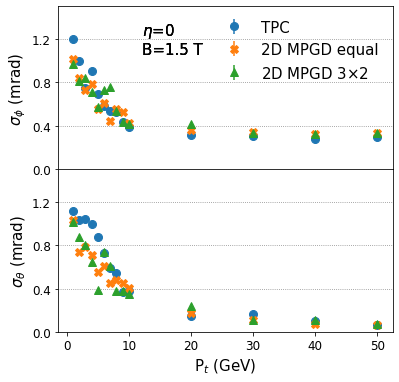

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))
fig.subplots_adjust(hspace=0)
#for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE = getdata_ang(i)
    ax[0].errorbar(pt, phi_res*1e3, yerr=phi_resE*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    ax[0].legend(fontsize=15, frameon=False)
#     ax[0].set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax[0].set_ylabel("$\sigma_{\phi}$ (mrad)", fontsize=15)
    ax[0].tick_params(axis='both', which='major', labelsize=12)

    ax[0].yaxis.set_ticks([0,0.4,.8,1.2])
    ax[0].set_ylim([0,1.5])
    
    ax[0].text(0.25, 0.8, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax[0].transAxes, fontsize=15)
    ax[0].grid(True, axis="y",linestyle=":", color="gray")

for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE = getdata_ang(i)
    ax[1].errorbar(pt, theta_res*1e3, yerr=theta_resE*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    #ax1.legend(fontsize=15, frameon=False)
    ax[1].set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax[1].set_ylabel(r"$\sigma_{\theta}$ (mrad)", fontsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=12)
    
    ax[1].yaxis.set_ticks([0,0.4,.8,1.2])
    ax[1].set_ylim([0,1.5])
    #ax.text(0.1, 0.5, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
    #verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax[1].grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("angular_resolution_pt_eta0.pdf", transparent=True, bbox_inches='tight')
fig.savefig("angular_resolution_pt_eta0.png", transparent=True, bbox_inches='tight', dpi=600)

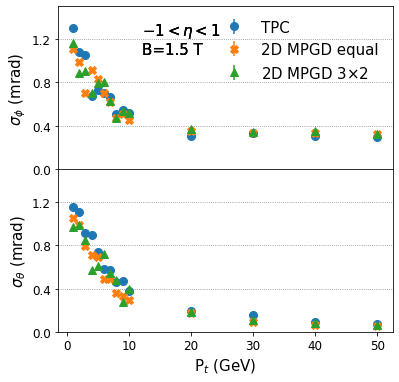

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))
fig.subplots_adjust(hspace=0)
#for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE = getdata_ang(i,1)
    ax[0].errorbar(pt, phi_res*1e3, yerr=phi_resE*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    ax[0].legend(fontsize=15, frameon=False)
#     ax[0].set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax[0].set_ylabel("$\sigma_{\phi}$ (mrad)", fontsize=15)
    ax[0].tick_params(axis='both', which='major', labelsize=12)

    ax[0].yaxis.set_ticks([0,0.4,.8,1.2])
    ax[0].set_ylim([0,1.5])
    ax[0].text(0.25, 0.8, '$-1<\eta<1$\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax[0].transAxes, fontsize=15)
    ax[0].grid(True, axis="y",linestyle=":", color="gray")

for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE = getdata_ang(i,1)
    ax[1].errorbar(pt, theta_res*1e3, yerr=theta_resE*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    #ax1.legend(fontsize=15, frameon=False)
    ax[1].set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax[1].set_ylabel(r"$\sigma_{\theta}$ (mrad)", fontsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=12)
    
    ax[1].yaxis.set_ticks([0,0.4,.8,1.2])
    ax[1].set_ylim([0,1.5])
    #ax.text(0.1, 0.5, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
    #verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax[1].grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("angular_resolution_pt_eta1.pdf", transparent=True, bbox_inches='tight')
fig.savefig("angular_resolution_pt_eta1.png", transparent=True, bbox_inches='tight', dpi=600)

In [15]:
df = pd.read_csv("all_log_1e4_fit_angular_dirc.csv", delim_whitespace=True)
# the numbers in this file are obtained by using gaussian fit

In [16]:
df.head(5)

,detector,eta,pt,phi_res,phi_resE,theta_res,theta_resE,pt_res,pt_resE,p_res,p_resE
0,MM_6_3x2_1D,0.931632,1,0.004978,0.000055,0.004412,0.000038,0.026732,0.000352,0.025341,0.000360
1,MM_6_3x2_1D,0.931632,2,0.006074,0.000062,0.000717,0.000007,0.064453,0.000662,0.063645,0.000635
2,MM_6_3x2_1D,0.931632,3,0.006605,0.000060,0.000466,0.000004,0.102891,0.000970,0.102963,0.000977
3,MM_6_3x2_1D,0.931632,4,0.006662,0.000062,0.000358,0.000003,0.132936,0.001406,0.132486,0.001378
4,MM_6_3x2_1D,0.931632,5,0.006691,0.000062,0.000285,0.000003,0.164008,0.001877,0.162416,0.001882


In [17]:
def getdata_ang(det="TPC", eta=0):
    pt = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt"])
    phi_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["phi_res"])
    phi_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["phi_resE"])
    theta_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["theta_res"])
    theta_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["theta_resE"])
    pt_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt_res"])
    pt_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["pt_resE"])
    p_res = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["p_res"])
    p_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) ]["p_resE"])
    return pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE

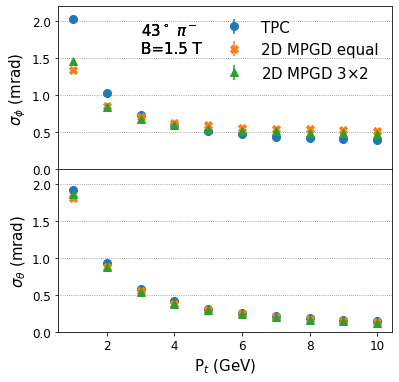

In [24]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))
fig.subplots_adjust(hspace=0)
#for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(i, 0.4316947267462241)
    ax[0].errorbar(pt[:10], phi_res[:10]*1e3, yerr=phi_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    ax[0].legend(fontsize=15, frameon=False)
#     ax[0].set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax[0].set_ylabel("$\sigma_{\phi}$ (mrad)", fontsize=15)
    ax[0].tick_params(axis='both', which='major', labelsize=12)

    ax[0].yaxis.set_ticks([0,0.5,1,1.5,2.,2.5])
    ax[0].set_ylim([0,2.2])
    
    ax[0].text(0.25, 0.8, '43$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax[0].transAxes, fontsize=15)
    ax[0].grid(True, axis="y",linestyle=":", color="gray")

for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(i, 0.4316947267462241)
    ax[1].errorbar(pt[:10], theta_res[:10]*1e3, yerr=theta_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    #ax1.legend(fontsize=15, frameon=False)
    ax[1].set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax[1].set_ylabel(r"$\sigma_{\theta}$ (mrad)", fontsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=12)
    
    ax[1].yaxis.set_ticks([0,0.5,1,1.5,2,2.5])
    ax[1].set_ylim([0,2.2])
    #ax.text(0.1, 0.5, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
    #verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax[1].grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("angular_resolution_pt_deg43_dirc_10GeV.pdf", transparent=True, bbox_inches='tight')
fig.savefig("angular_resolution_pt_deg43_dirc_10GeV.png", transparent=True, bbox_inches='tight', dpi=600)

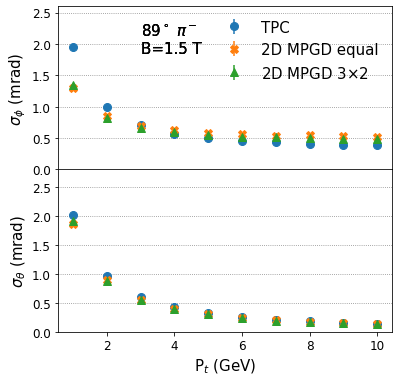

In [19]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))
fig.subplots_adjust(hspace=0)
#for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(i, 0.01745417868358519)
    ax[0].errorbar(pt[:10], phi_res[:10]*1e3, yerr=phi_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    ax[0].legend(fontsize=15, frameon=False)
#     ax[0].set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax[0].set_ylabel("$\sigma_{\phi}$ (mrad)", fontsize=15)
    ax[0].tick_params(axis='both', which='major', labelsize=12)

    ax[0].yaxis.set_ticks([0,0.5,1,1.5,2.,2.5])
    ax[0].set_ylim([0,2.6])
    
    ax[0].text(0.25, 0.8, '89$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax[0].transAxes, fontsize=15)
    ax[0].grid(True, axis="y",linestyle=":", color="gray")

for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(i, 0.01745417868358519)
    ax[1].errorbar(pt[:10], theta_res[:10]*1e3, yerr=theta_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    #ax1.legend(fontsize=15, frameon=False)
    ax[1].set_xlabel("P$_t$ (GeV)", fontsize=15)
    ax[1].set_ylabel(r"$\sigma_{\theta}$ (mrad)", fontsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=12)
    
    ax[1].yaxis.set_ticks([0,0.5,1,1.5,2,2.5])
    ax[1].set_ylim([0,2.8])
    #ax.text(0.1, 0.5, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
    #verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax[1].grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("angular_resolution_pt_deg89_dirc_10GeV.pdf", transparent=True, bbox_inches='tight')
fig.savefig("angular_resolution_pt_deg89_dirc_10GeV.png", transparent=True, bbox_inches='tight', dpi=600)

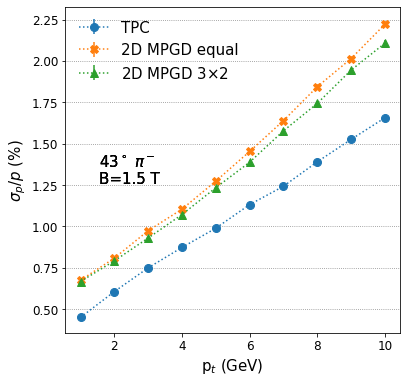

In [20]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(i,0.4316947267462241)
    ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
    ax.set_ylabel("$\sigma_{p}/p$ (%)", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    #ax.yaxis.set_ticks(np.arange(0, 13, 2))
    #ax.set_ylim([0,12])
    ax.text(0.1, 0.5, '43$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("momentum_resolution_p_deg43_dirc_10GeV.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_p_deg43_dirc_10GeV.png", transparent=True, bbox_inches='tight', dpi=600)

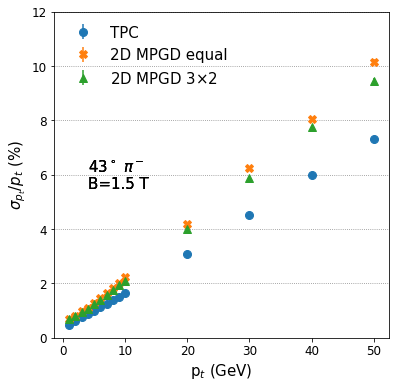

In [21]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(i,0.4316947267462241)
    ax.errorbar(pt, pt_res*100, yerr=pt_resE*100, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    ax.legend(fontsize=15, frameon=False)
    ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
    ax.set_ylabel("$\sigma_{p_t}/p_t$ (%)", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.yaxis.set_ticks(np.arange(0, 13, 2))
    ax.set_ylim([0,12])
    ax.text(0.1, 0.5, '43$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
    verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("momentum_resolution_pt_deg43_dirc.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_pt_deg43_dirc.png", transparent=True, bbox_inches='tight', dpi=600)

In [22]:
getdata_ang("MM_6_3x2_2D", 0.4316947267462241)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 20, 30, 40, 50]),
 array([0.00145709, 0.00084455, 0.00067549, 0.00059778, 0.00054862,
        0.00051931, 0.0005105 , 0.0004912 , 0.00048854, 0.00048224,
        0.00046239, 0.00045851, 0.00045419, 0.00044743]),
 array([1.18208e-05, 6.60526e-06, 5.24532e-06, 4.77733e-06, 4.11450e-06,
        4.08050e-06, 3.91362e-06, 3.66263e-06, 3.70059e-06, 3.72738e-06,
        3.52429e-06, 3.56522e-06, 3.38543e-06, 3.32192e-06]),
 array([1.87052e-03, 8.86286e-04, 5.48430e-04, 3.86761e-04, 3.02883e-04,
        2.45565e-04, 2.01649e-04, 1.70095e-04, 1.53065e-04, 1.32901e-04,
        6.61091e-05, 4.55455e-05, 3.67741e-05, 3.25624e-05]),
 array([1.61706e-05, 7.30291e-06, 4.67545e-06, 3.31482e-06, 2.52791e-06,
        2.04385e-06, 1.73143e-06, 1.42219e-06, 1.34564e-06, 1.16040e-06,
        5.61554e-07, 3.74430e-07, 2.84399e-07, 2.73665e-07]),
 array([0.00674035, 0.00793051, 0.00932087, 0.0107323 , 0.0123368 ,
        0.0138669 , 0.0157578 , 0.017411  , 0.01